In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Layer
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
california_housing = fetch_california_housing()

data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['Target'] = california_housing.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
missing_data_count = data.isnull().sum()
missing_data_count

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


In [15]:
X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_scaled_data = pd.DataFrame(X_train_scaled, columns=california_housing.feature_names)
train_scaled_data['Target'] = y_train

test_scaled_data = pd.DataFrame(X_test_scaled, columns=california_housing.feature_names)
test_scaled_data['Target'] = y_test

print(train_scaled_data.shape, test_scaled_data.shape)

(16512, 9) (4128, 9)


# Neural Network Model with an RBF layer

In [23]:
# Define a custom RBF layer
class RBFLayer(Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_uniform',
                                       trainable=True)
        self.built = True

    def call(self, inputs):
        # Compute Euclidean distance and apply Gaussian function
        diff = tf.expand_dims(inputs, axis=1) - self.centers
        sq_diff = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.gamma * sq_diff)

# Design a neural network model with an RBF layer
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    RBFLayer(units=10, gamma=0.5),
    Dense(1)  # Output a single prediction value
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3363 - val_loss: 0.8650
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8031 - val_loss: 0.7125
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6947 - val_loss: 0.6678
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6742 - val_loss: 0.6318
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6185 - val_loss: 0.6098
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5894 - val_loss: 0.5961
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5842 - val_loss: 0.5863
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5719 - val_loss: 0.5706
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5581 - val_loss: 0.5685
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5568 - val_loss: 0.5553
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5432 - val_loss: 0.5503
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [24]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss:", test_loss)

# Predict and calculate mean squared error
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Test Loss: 0.48841360211372375
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 0.4884135845791025


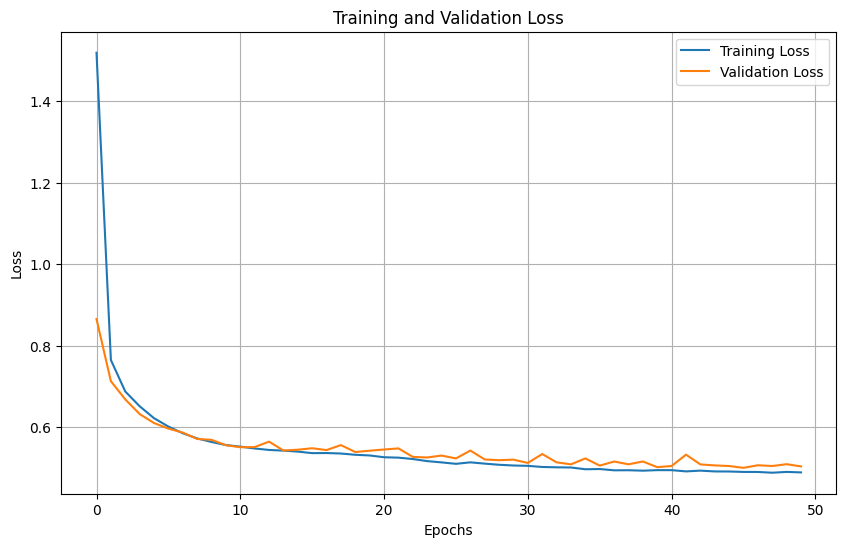

In [25]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Neural Network Model with Dense layers

In [27]:
# Design a neural network model with Dense layers
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output a single prediction value
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0260 - val_loss: 0.4382
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4639 - val_loss: 0.4004
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3838 - val_loss: 0.3932
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4354 - val_loss: 0.3553
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3702 - val_loss: 0.3528
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3347 - val_loss: 0.4098
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3586 - val_loss: 0.3504
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3464 - val_loss: 0.3401
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3518 - val_loss: 0.3713
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3532 - val_loss: 0.3673
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3290 - val_loss: 0.3349
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [28]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss:", test_loss)

# Predict and calculate mean squared error
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Test Loss: 0.2941283583641052
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 0.2941283140516302


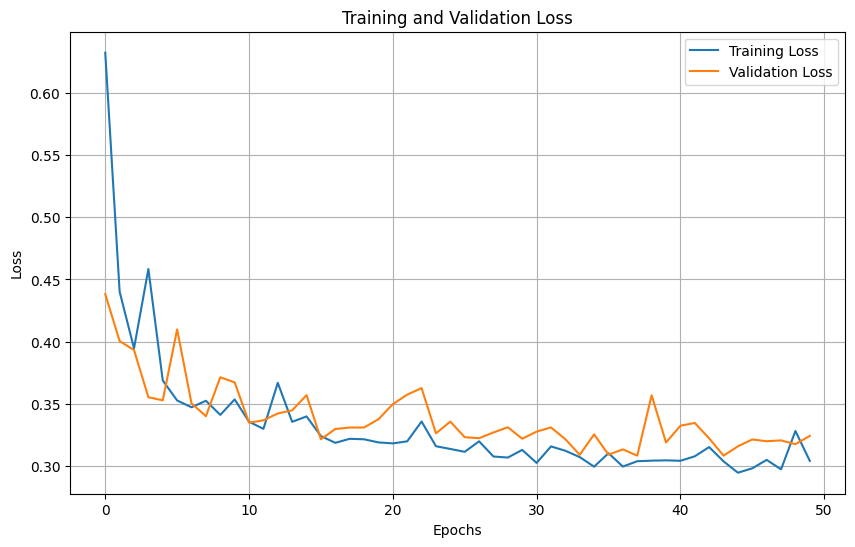

In [29]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()